# Linear Regression

To simplify, Linear Regression is simply a weighted sum of inputs plus a constant:


$\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n$


### Simple Linear Regression

Creating a simple one dimentional function of a linear relation between X and y: 

$\hat{y} = \beta_{0} + \beta_{1}x_1 $

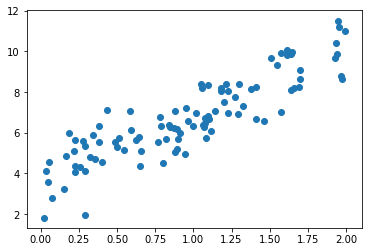

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100) 
y = 4 + 3 * X + np.random.randn(100)

data = pd.DataFrame({'covariate':X, 'response':y})

plt.scatter(X, y)

### Least Squares Estimates

the least squares estimates for $\theta_{0}$ and $\theta_{1}$ is:

$\beta_{0} = \frac{\sum_{i=0}^{n}(X_i - \hat{X_n})(Y_i - \hat{Y_n})}{\sum_{i=0}^{n}(X_i - \hat{X_n})^2} $

$\beta_{1} = \hat{Y_n} - \beta_{0} * \hat{X_n} $


In [2]:
def deviation(array):
    return [x-np.mean(array) for x in array]

def squared_deviation(array):
    return [(x-np.mean(array))**2 for x in array]

print(deviation(X)[:4])
print(squared_deviation(X)[:4])

[0.2226769674304958, 0.2213193794389956, -0.1154397212908389, 0.6510504900752263]
[0.04958503182404209, 0.04898226771526211, 0.013326329251706565, 0.4238667406271924]


In [3]:
def least_squares_fit(X, y):
    numerator = np.sum([x_dev*y_dev for x_dev, y_dev in zip(deviation(X), deviation(y))])
    denominator = np.sum(squared_deviation(X))
    
    slope = numerator/denominator

    intercept = np.mean(y) - slope * np.mean(X) 

    return intercept, slope

least_squares_fit(X, y)

(3.653112316791734, 3.183191542356812)

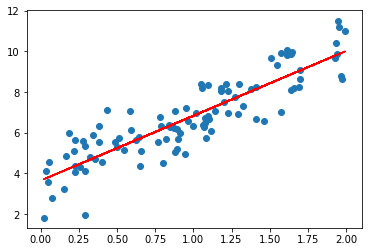

In [4]:
intercept, slope = least_squares_fit(X, y)

y_pred = intercept + X*slope

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

### Plot the residuals

The error term or residuals assume to be:

* Normally distributed
* Homoscedastic (same variance for every X)
* Independent 


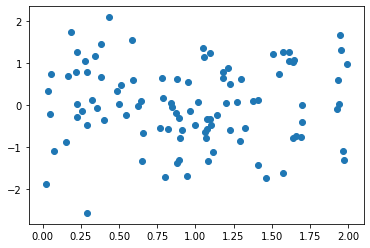

In [5]:
residuals = [ (real - pred) for real, pred in zip(y, y_pred)]
plt.scatter(X, residuals)

There is no trend or variance changing for X 

In [6]:
pd.Series(residuals).describe()

count    1.000000e+02
mean    -1.429967e-15
std      9.413165e-01
min     -2.589257e+00
25%     -5.898115e-01
50%      8.240683e-03
75%      7.136065e-01
max      2.108838e+00
dtype: float64

(array([ 1.,  4.,  7., 10., 18., 22., 12., 14.,  9.,  3.]),
 array([-2.58925677, -2.11944728, -1.64963779, -1.17982831, -0.71001882,
        -0.24020933,  0.22960015,  0.69940964,  1.16921913,  1.63902862,
         2.1088381 ]),
 <a list of 10 Patch objects>)

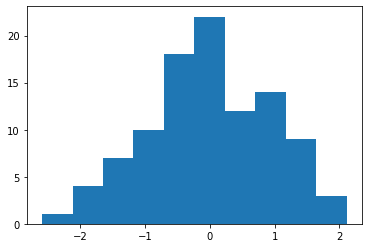

In [7]:
plt.hist(residuals)

The hist seem like to have a small skeweness to the left (Negative skewed)

In [8]:
def RSS(y, y_pred):
    square_erors = [ (real - pred)**2 for real, pred in zip(y, y_pred)]
    return sum(square_erors)

def RSE(y, y_pred):
    rss = RSS(y, y_pred)
    return np.sqrt(rss/(len(y)-2))

rse = RSE(y, y_pred)
print(rse)

0.9461069274900195


In [9]:
se_intercept = rse * (1/len(X) + np.average(X)/np.sum(squared_deviation(X)))
se_slope = rse * 1/np.sum(squared_deviation(X))

print('SE Intercept: {}\nSE slope: {}'.format(se_intercept, se_slope))

SE Intercept: 0.03956415299734155
SE slope: 0.031340419561063065


## Test statistic

The test statistic is a t statistic (t) defined by the following equation:

$t = \frac{\hat{\beta_1} - 0}{ SE(\beta_1) } $

$t = \frac{\hat{\beta_0} - 0}{ SE(\beta_0) } $


In [10]:
print('t_intercept: {}\nt_slope: {}'.format(intercept/se_intercept, slope/se_slope))

t_intercept: 92.3338941955158
t_slope: 101.5682491472312
